In [46]:
pip install cufflinks --upgrade 

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')
import cufflinks as cf
cf.go_offline()
import plotly
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Extracting data


In [49]:
data=pd.read_csv("TATAMOTORS.NS.csv")
print(data)

            Date              Open              High               Low  \
0     25-12-1995  72.8196260000000  72.8196260000000  72.8196260000000   
1     26-12-1995  72.8196260000000  72.8196260000000  72.8196260000000   
2     27-12-1995  72.8196260000000  72.8196260000000  72.8196260000000   
3     28-12-1995  72.8196260000000  72.8196260000000  72.8196260000000   
4     29-12-1995  72.8196260000000  72.8196260000000  72.8196260000000   
...          ...               ...               ...               ...   
6809  06-01-2023 386.1000060000000 388.3999940000000 381.0000000000000   
6810  09-01-2023 386.3500060000000 392.7000120000000 385.0000000000000   
6811  10-01-2023 400.0000000000000 417.7500000000000 400.0000000000000   
6812  11-01-2023 415.7500000000000 420.0000000000000 413.5499880000000   
6813  12-01-2023 420.2999880000000 420.5000000000000 410.0499880000000   

                 Close         Adj Close                 Volume  
0     72.8196260000000  53.4727670000000     

In [50]:
start_date='1999-01-01'
end_date='2023-01-30'
ticker='TATAMOTORS.NS'
df=yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Open             High              Low  \
Date                                                            
1999-01-01 31.5998859405518 32.1556129455566 31.0537376403809   
1999-01-04 32.0214729309082 32.6634368896484 31.5615596771240   
1999-01-05 31.7148647308350 34.2156448364258 31.2836952209473   
1999-01-06 34.6372299194336 35.3175201416016 33.8707084655762   
1999-01-07 35.2696113586426 36.8505630493164 35.1642150878906   

                      Close        Adj Close    Volume  
Date                                                    
1999-01-01 31.8394241333008 24.8436164855957  18835718  
1999-01-04 31.6765384674072 24.7165184020996  18245781  
1999-01-05 34.2156448364258 26.6977291107178  38938718  
1999-01-06 35.2217025756836 27.4827365875244  40059886  
1999-01-07 36.6972579956055 28.6340808868408  35983032

# Data Exploration

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6028 entries, 1999-01-01 to 2023-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6028 non-null   float64
 1   High       6028 non-null   float64
 2   Low        6028 non-null   float64
 3   Close      6028 non-null   float64
 4   Adj Close  6028 non-null   float64
 5   Volume     6028 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 329.7 KB


In [52]:
df.describe()

Open               High                Low  \
count 6028.0000000000000 6028.0000000000000 6028.0000000000000   
mean   202.9561201708160  206.0691993744388  199.4507693132187   
std    157.4676687295467  159.2979281349897  155.3318149549277   
min     11.1145744323730   11.6319770812988   11.0283403396606   
25%     74.0460662841797   75.8345584869385   72.4794845581055   
50%    157.7119827270508  160.3137130737305  154.3444976806641   
75%    325.0000000000000  329.4375152587891  316.5874938964844   
max    600.2120971679688  605.9011230468750  589.8730468750000   

                   Close          Adj Close                  Volume  
count 6028.0000000000000 6028.0000000000000      6028.0000000000000  
mean   202.6323339551509  196.9403146710235  16539487.3827140014619  
std    157.2106575830800  160.1285047016206  21552844.6617505997419  
min     11.2678785324097    9.0994062423706         0.0000000000000  
25%     74.0748062133789   63.4295234680176   5864079.7500000000000  
50%    157.5242462158203  145.5688095092773  10043998.5000000000000  
75%    322.9124984741211  321.6755905151367  18555245.7500000000000  
max    598.1343994140625  597.8922729492188 390577839.0000000000000

# Exploratory Data Analysis

In [53]:
print("Mean of Closing price:",df['Close'].mean())
print("Median od Closeing price:",df['Close'].median())
print("Standard deviation of Closing price:",df['Close'].std())
print("Maximum value of Closing price:",df['Close'].max())
print("Minimum value of Closing price:",df['Close'].min())

Mean of Closing price: 202.63233395515093
Median od Closeing price: 157.5242462158203
Standard deviation of Closing price: 157.21065758308
Maximum value of Closing price: 598.1343994140625
Minimum value of Closing price: 11.267878532409668


In [54]:
# Percent return
returns=df['Close'].pct_change()
returns.head()

Date
1999-01-01                NaN
1999-01-04   -0.0051158483650
1999-01-05    0.0801573180615
1999-01-06    0.0294034423162
1999-01-07    0.0418933586970
Name: Close, dtype: float64

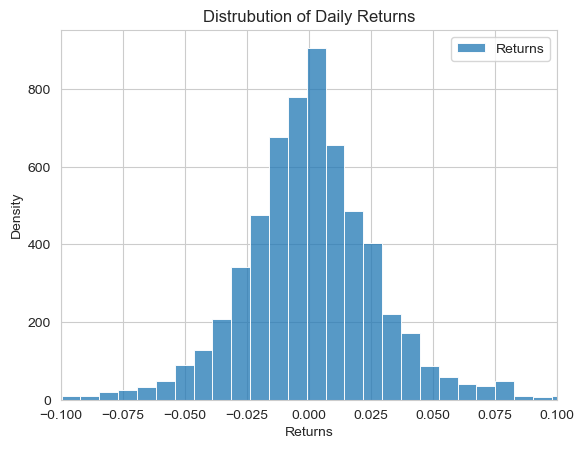

In [55]:
sns.histplot(returns[1:], bins=50, label='Returns')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Distrubution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.10, 0.10)
plt.show()

In [56]:
# Date with lowest and highest returns
print(returns.idxmax())
print(returns.idxmin())

2021-10-13 00:00:00
2019-02-08 00:00:00


In [57]:
#chart variation b/w highest and lowest returns
Chart = df[["Open","High","Low","Close"]].loc['2019-01-01':'2022-01-01']
Chart.iplot(kind='candle')

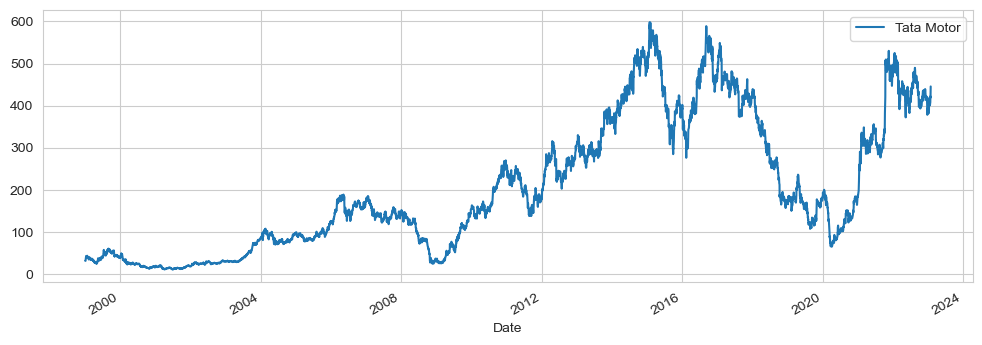

In [58]:
Closed_price=df['Close']
Closed_price.plot(label="Tata Motor", figsize=(12,4))
plt.legend()

In [59]:
Closed_price.iplot()

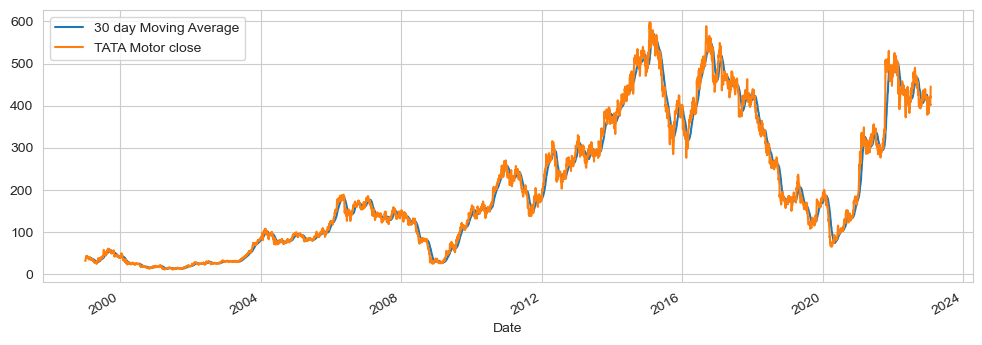

In [60]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label="30 day Moving Average")
df['Close'].plot(label='TATA Motor close')
plt.legend()

In [61]:
Moving_Avg = df['Close'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Closed_price,on='Date')
New_df.rename(columns = {'Close_x':'Moving 30 day Avg'}, inplace=True)
New_df.rename(columns = {'Close_y':'Closing Price'}, inplace= True)
New_df.iplot()

<AxesSubplot:>

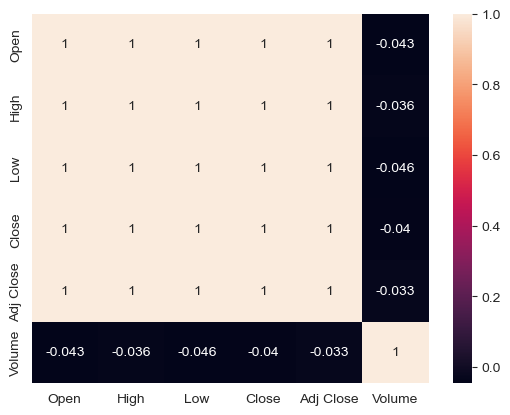

In [62]:
sns.heatmap(df.corr(),annot=True)

In [63]:
df['Close'].loc['2022-01-01':'2023-01-01'].ta_plot(study='sma',periods=[7,21,55])

In [64]:
df['Close'].loc['2022-01-30':'2023-01-30'].ta_plot(study='boll')

# Feature Engineering

In [65]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [66]:
df['change_percent']=(df['Close']-df['Open'])/df['Open']*100
print(df)

                        Open              High               Low  \
Date                                                               
1999-01-01  31.5998859405518  32.1556129455566  31.0537376403809   
1999-01-04  32.0214729309082  32.6634368896484  31.5615596771240   
1999-01-05  31.7148647308350  34.2156448364258  31.2836952209473   
1999-01-06  34.6372299194336  35.3175201416016  33.8707084655762   
1999-01-07  35.2696113586426  36.8505630493164  35.1642150878906   
...                      ...               ...               ...   
2023-01-20 404.0000000000000 412.5000000000000 401.2000122070312   
2023-01-23 407.0000000000000 410.9500122070312 405.0000000000000   
2023-01-24 410.0000000000000 424.0000000000000 410.0000000000000   
2023-01-25 423.7500000000000 427.2500000000000 417.7000122070312   
2023-01-27 438.0000000000000 453.3999938964844 435.1499938964844   

                       Close         Adj Close    Volume   change_percent  
Date                                   

In [67]:
df['high_low_percent'] = (df['High']-df['Low'])/df['Close']*100

In [68]:
#keeping the necesary column
df= df[['Close' , 'high_low_percent' , 'change_percent']]

In [69]:
#weekly moving average
df['ma_7']= df['Close'].rolling(window=7).mean()

In [70]:
#bollinger bands for close price
#Upper band=Moving Average(MA)+2*Standard Deviation(STD), Lower band=Moving Average(MA)-2*Standard Deviation(STD)
df['ma_20']= df['Close'].rolling(window=20).mean()
df['std_20']= df['Close'].rolling(window=20).std()

df['upper band']= df['ma_20']+2 * df['std_20']
df['lower band']= df['ma_20']-2 * df['std_20']
df= df.drop(['ma_20'],axis=1)

In [71]:
df['momentum'] = df['Close'].diff(periods=1)

In [72]:
df['log_returns']= np.log(df['Close']/df['Close'].shift(1))

In [73]:
df.dropna(inplace=True)

In [74]:
df.head()

Close  high_low_percent   change_percent  \
Date                                                             
1999-01-28 40.4340553283691   3.7440758070276 -2.4503050399465   
1999-01-29 40.6065216064453   3.5865923089266  0.7129257240995   
1999-02-01 37.9428596496582   6.3636298743688 -5.7367248992638   
1999-02-02 37.7991333007812   3.9036752726057 -0.5295052593654   
1999-02-03 37.7991333007812   5.7541183527881 -1.3750027122627   

                       ma_7          std_20       upper band       lower band  \
Date                                                                            
1999-01-28 41.4209529331752 3.5585368960270 46.5330921827094 32.2989445986016   
1999-01-29 41.4250591823033 3.0845107897394 46.0233948437916 33.6853516848338   
1999-02-01 40.5846225193569 2.4664431315682 45.1005755865617 35.2348030602889   
1999-02-02 39.9070712498256 2.1166588279199 44.5801814024828 36.1135460908033   
1999-02-03 39.5032779148647 1.8498384456023 44.1754121741025 36.7760583916934   

                   momentum      log_returns  
Date                                          
1999-01-28 -0.8815002441406 -0.0215666937439  
1999-01-29  0.1724662780762  0.0042563008549  
1999-02-01 -2.6636619567871 -0.0678473497938  
1999-02-02 -0.1437263488770 -0.0037951608028  
1999-02-03  0.0000000000000  0.0000000000000

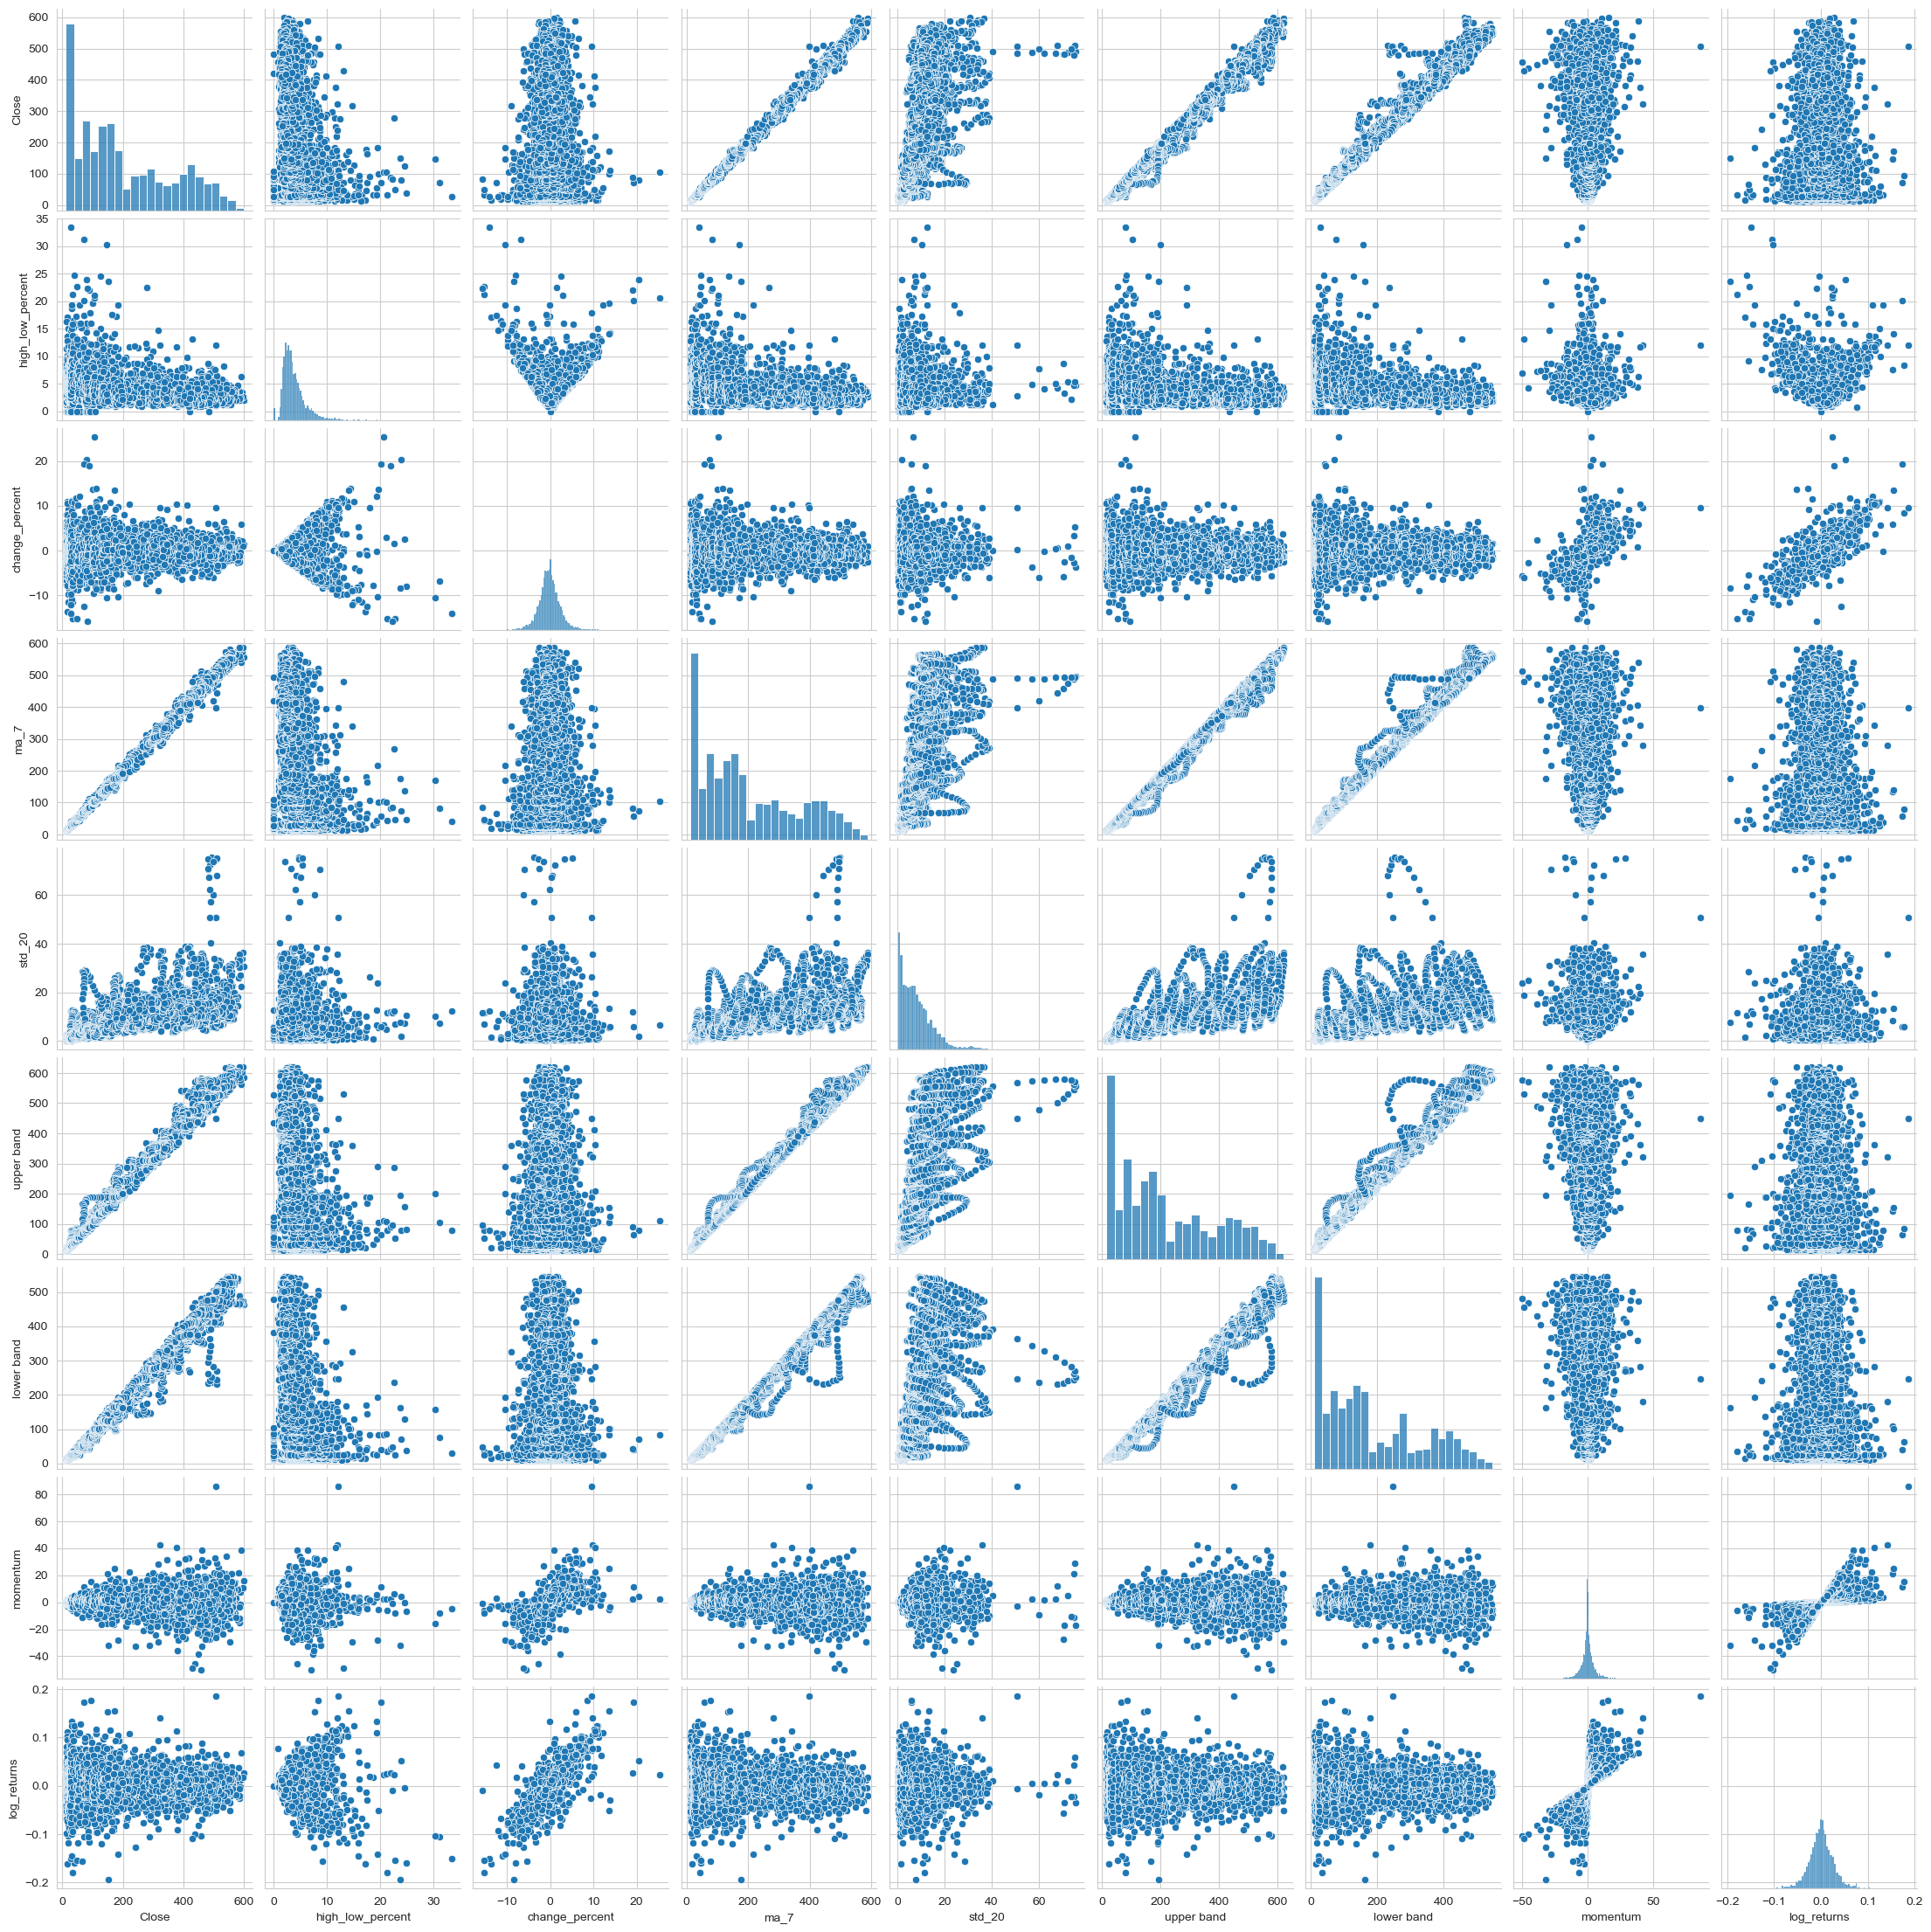

In [75]:
sns.pairplot(df)

<AxesSubplot:>

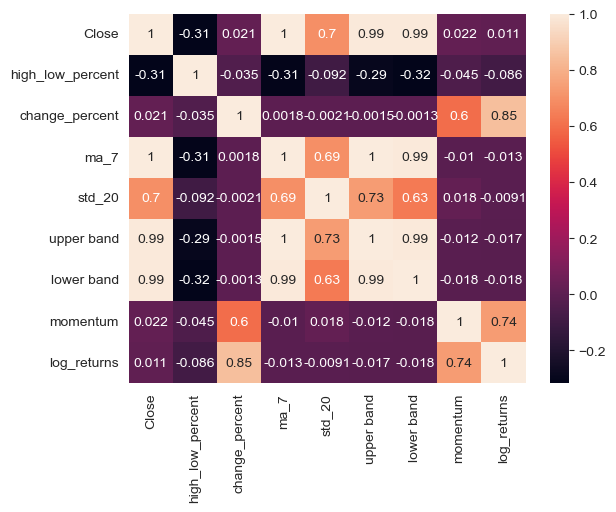

In [76]:
sns.heatmap(df.corr(),annot=True)

In [77]:
df.columns

Index(['Close', 'high_low_percent', 'change_percent', 'ma_7', 'std_20',
       'upper band', 'lower band', 'momentum', 'log_returns'],
      dtype='object')

# Model training






In [78]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)
df= df_scaled

In [79]:
X= df.drop(['Close'], axis=1)
y= df['Close']
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
model_lr= LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf= RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr= SVR()
model_svr.fit(X_train, y_train)

SVR()

In [81]:
y_predict_lr= model_lr.predict(X_test)
y_predict_rf= model_rf.predict(X_test)
y_predict_svr= model_svr.predict(X_test)

In [82]:
print("R2 score for Linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for Random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for Linear regression:  0.9986755111484286
R2 score for Random forest:  0.9981955885469244
R2 score for SVR:  0.9952447665510197


In [83]:
model= LinearRegression().fit(X_train,y_train)
y_test_predict = model.predict(X_test)
score= r2_score(y_test,y_test_predict)
mse= mean_squared_error(y_test, y_test_predict)
mae= mean_absolute_error(y_test, y_test_predict)
rmse= np.sqrt( mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

R2_Score: 0.9986755111484286
MSE: 0.0012689776459885367
MAE: 0.023455414085410815
RMSE: 0.03562271250183704


In [84]:
pd.options.display.float_format='{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual']= y_test
test_check['prediction']= y_test_predict
test_check['difference']= y_test - y_test_predict
test_check.sort_index()

actual       prediction       difference
1    -1.0341334078394 -1.0236579774280 -0.0104754304115
4    -1.0519947173852 -1.0422279493872 -0.0097667679980
12   -1.0491905301332 -1.0666664186446  0.0174758885114
14   -1.0425458967852 -1.0492843644174  0.0067384676322
15   -1.0443746945091 -1.0436694962523 -0.0007051982568
...               ...              ...              ...
5975  1.3424439875658  1.3882831334812 -0.0458391459154
5984  1.1146754731732  1.1869755377236 -0.0723000645503
5988  1.1627103918786  1.1333361865813  0.0293742052973
5994  1.1378976511291  1.1354362040556  0.0024614470734
6008  1.5425368646766  1.5009204526942  0.0416164119824

[1202 rows x 3 columns]

<AxesSubplot:xlabel='Close'>

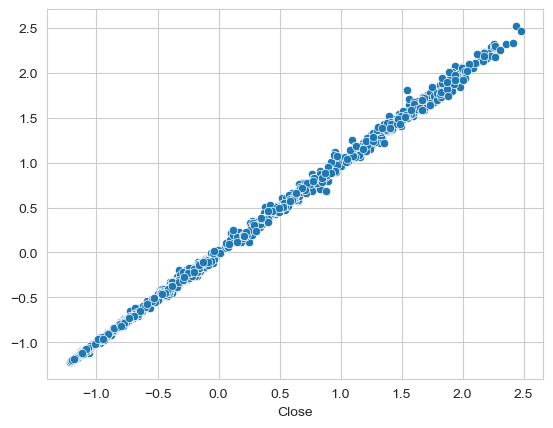

In [85]:
sns.scatterplot(y_test, y_test_predict)